# Titanic Passenger Analysis
## 1. Introduction

In this project, I would like to analyse `Titanic Data` which contains demographics and passenger information from 891 of the total 2224 passengers and crew on board the Titanic. After finishing loading our dataset, we would like to present several observations, which will give us a clearer understanding of our data records.

In each following part, we will ask ourselves several questions that we may be interested in, and then we will try to find answers of those questions and may ask some additional questions. In our final **summary** part, I will summary all questions that I am interested in again and their corresponding answers.

**Question 1:** How many observations and variables in our dataset? For the variables, what is the type of each variable, such as, continuous, discrete, etc?

**Question 2:** Is there any invalid or missing value in our dataset? If yes, what would you like to do?

In [1]:
# Load useful Python module
import pandas as pd
import numpy as np
## Read the dataset
titanic = pd.read_csv('titanic-data.csv')
## Print out the size of our dataset
print("This dataset has {} observations and {} variables.".format(titanic.shape[0], titanic.shape[1]))
## Print the first few lines of our dataset 
titanic.head()

This dataset has 891 observations and 12 variables.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the output above, we can read that there are 891 observations and 12 variables in our Titanic dataset. The description file can also help us understand this dataset in a more accurate way. Clearly, **Survived**, **Pclass**, **Sex**, **Cabin**, **Ticket** and **Embarked** are categorical variables while **Age** and **Fare** are continuous ones. Variable **SibSp** and **Parch** are discrete variables with only integer values. Variables **PassengerId** and **Name** which technically should be considered categorical variables are more like a primary key because neither **PassengerId** nor **Name** contains duplicate values, which can represent the corresponding observation.

From the table above, we can notice that variable **Cabin** contains 3 NaN's (not a number) which stands for the invalid record in our first 5 observations. In the following part, we would like to dig deeper into different variables in our dataset, and more potential missing and invalid values will be detected. Currently, there are many methods to solve this issue which includes but are not limited to pairwise deletion, regression imputation, mean or median substitution, etc. There is no perfect one, and different methods have different their own advantages and disadvantages. In this project, we will use pairwise deletion to deal with missing or invalid data.

In [2]:
## Convert the values of Survived, Pclass and Embarked back to their original values.
titanic.Survived = np.where(titanic.Survived == 0, "No",
                            np.where(titanic.Survived == 1, "Yes", None))
titanic.Pclass = np.where(titanic.Pclass == 1, "1st",
                          np.where(titanic.Pclass == 2, "2nd",
                                   np.where(titanic.Pclass == 3, "3rd", None)))
titanic.Embarked = np.where(titanic.Embarked == 'S', "Southampton",
                            np.where(titanic.Embarked == "C", 'Cherbourg',
                                     np.where(titanic.Embarked == "Q", 'Queenstown', None)))

## 2. Numerical Variables

**Question 3:** What are the distributions of our numerical variables? Can I find ways to present their distributions quantatitively and visually? For example, what are the basic five number summary statistics, do those two have any missing or invalid values, etc?

### 2.1 Summary Statistics

First of all, I would like to take a look at our continuous variables **Age** and **Fare**. At the beginning, we take a look at the basic summary statistics of these two.

In [3]:
## Print the descriptive statistics of numerical variables
titanic[['Age', 'Fare', 'SibSp', 'Parch']].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


For variable **Age**, we can read that the average age of the passengers is 29.70. The youngest passenger is only 0.42 years (approximate 5 months) old while the oldest is 80 years old. The 25 percentile, median and 75 percentile are 20.13, 28 and 38, respectively. Clearly, the result shows that the passengers that in our dataset tended to be younger than middle age (45-65 from Wikipedia).

For variable **Fare**, we can know that the average fare of the passengers is 32.20. The cheapest ticket only was totally free while the most expensive tickets did cost 512.3292. Usually, the prices only contain numerical values with 2 decimal places, which means that this value may be due to different units, like U.S. dollar to U.K. pound, or some other reasons. The 25 percentile, median and 75 percentile are 7.9104, 14.4542 and 31. These values show that the tickets that passengers in our dataset were not extremely expensive. The searching result on Google tells us that the most expensive tickets of Titanic cost 870 U.K. pounds (4350 U.S. dollars) at that time.

The "count" here needs our attention particularly. We already knew that we have 891 observations in our dataset. But we only have 714 **Age** records here, which means that 177 passengers in our dataset were missing values. Luckily, there is no missing values in the variable of **Fare**.

### 2.2 Data Visualization

Boxplot and histogram can help us understand the distributions of our variables visually and semi-quantitatively. Like the summary statistics that we have listed before, boxplot mainly focuses on the five number summary. Histogram mainly helps us understand the distribution of our variables since different distributions may still have the same five number summary values.

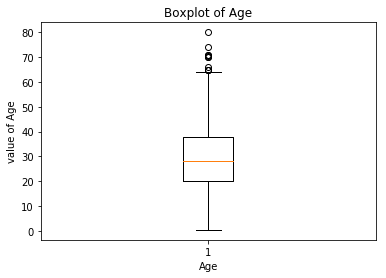

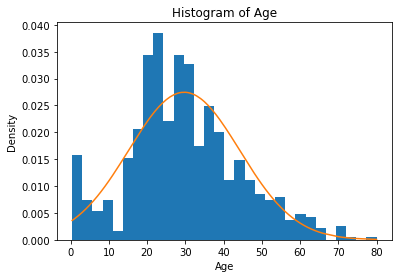

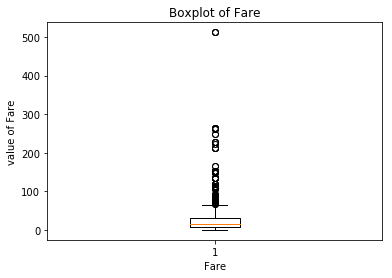

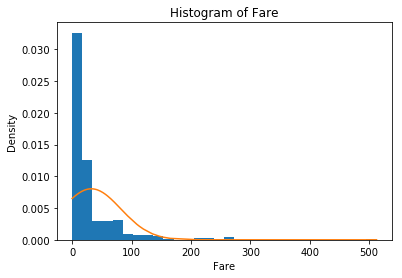

In [4]:
%matplotlib inline
## Load necessary Python module
import matplotlib.pyplot as plt
import scipy.stats as ss
## This function is used for creating a boxplot
def Boxplot(var):
    x = titanic[var].dropna()
    plt.boxplot(x)
    plt.title("Boxplot of " + var)
    plt.xlabel(var)
    plt.ylabel("value of {}".format(var))
    plt.show()
## This function is used for creating a histogram
def Histogram(var, bin_num = 30, log = False, plus = None):
    if log == False:
        x = titanic[var].dropna()
        plt.title("Histogram of {}".format(var))
        plt.xlabel(var)
    elif log == True and plus != None:
        x = np.log(titanic[var].dropna()+1)
        plt.title("Histogram of log({}+1)".format(var))
        plt.xlabel("log({}+1)".format(var))
    else:
        x = np.log(titanic[var].dropna())
        plt.title("Histogram of log({})".format(var))
        plt.xlabel("log({})".format(var))
    plt.hist(x, bin_num, normed = True)
    mean, std = x.mean(), x.std()
    plt.plot(sorted(x), ss.norm.pdf(sorted(x), mean, std))
    plt.ylabel("Density")
    plt.show()
## This function is used for creating a bar plot
def Barplot(var):
    count_ = titanic[var].value_counts(sort = False)
    val = [j for j in count_.values]
    loc = np.arange(len(val))
    level = [str(i) for i in count_.index]
    plt.bar(left = loc, height = val)
    plt.xticks(loc, level)
    plt.title("Barplot of {}".format(var))
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()
## Draw boxplot and histogram of variable Age and Fare
for var in ['Age', 'Fare']:
    Boxplot(var)
    Histogram(var)

The frequency table of variable SibSp.
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


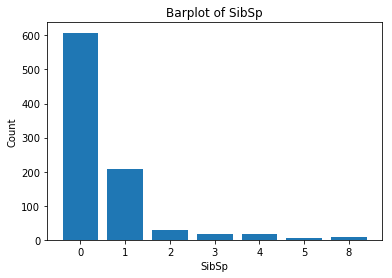

The frequency table of variable Parch.
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


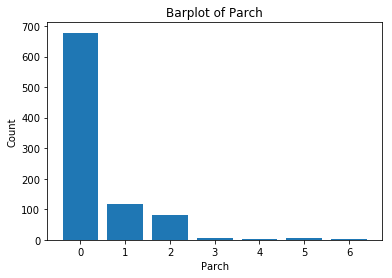

In [5]:
## Print out the frequency table and Barplot of variable SibSp and Parch
for var in ['SibSp', 'Parch']:
    print("The frequency table of variable {}.".format(var))
    print(titanic[var].value_counts(sort = False))
    Barplot(var)

First, we focus on the variable **Age**. Both boxplot and histogram show that the age of our valid 791 passengers tend to be younger while there are several outliers which indicate old passengers. Additionally, I added a normal distribution curve to the histogram to check if it follows normal distribution. We can read from the plot that most parts can fit with the normal distribution curve while the middle part tends to be slightly higher. We may notice the slightly positive skewness trend in this histogram, too.

Then, we talk about the variable **Fare**. The histogram clearer shows that this distribution is positively skewed, and at the same time, our boxplot shows that there are several outliers with extremely comparatively expensive Titanic tickets. Positive skewness also indicates non-normal distribution.

In addition to these two histogram, we still would like to perform logarithm transformation on these two variables to check if they may follow log-normal distribution. We will plus a small value 1 to each value of variable **Fare** in case of the existence of 0 value.

We used barplots to present variable **SibSp** and **Parch**'s distributions. We found that actually many passengers did not travel with their siblings or children. And very few passengers travered with more than 1 sibling or 2 children. Actually, this record may not be exactly true, because people may travel with their grandchildren or even great grandchildren.

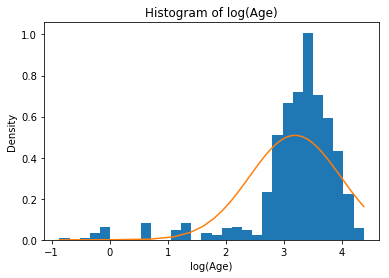

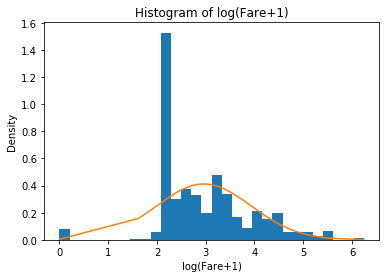

In [6]:
## Perform histogram of variable Age and Fare after logarithm transformation
for var in ['Age', 'Fare']:
    if var == 'Fare':
        plus_ = 1
    else:
        plus_ = None
    Histogram(var, log = True, plus = plus_)
    plt.show()

In the histogram of `log(Age)`, the distribution shows an obvious negative skewness. In the histogram of `log(Fare+1)`, there still exists a special interval which ranges approximately from 2 to 2.2 with an extremely high frequency.

Hence, based on results, we can say that variables **Age** follows normal distribution and **Fare** follows log-normal distribution approximately.

## 3. Categorical Variables

**Question 4:** What are the distributions of our categorical variables? Is there any variable that you think not as useful as the others? If yes, why? Do those variables have any missing or invalid records? What information can we get from their distributions.

### 3.1 Summary Statistics

Like continuous variables, we take a look at the basic summary statistics of **Survived**, **Pclass**, **Sex**, **Ticket**, **Cabin** and **Embarked** these five categorical variables at the beginning.

In [7]:
## Convert variable types
titanic.Survived = titanic.Survived.astype('object', copy=False)
titanic.Pclass = titanic.Pclass.astype('object', copy=False)
## Print the descriptive statistics of categorical variables
titanic[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']].describe()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,3,2,681,147,3
top,No,3rd,male,347082,B96 B98,Southampton
freq,549,491,577,7,4,644


For variable **Survived**, we have two different classes and the class `0` with frequency being 549 is more common than another one `1`. The description file tells us that the value `1` and `0` stand for whether the passenger survived or not, respectively. We can read that 549 passengers among these 891 did not make it while the rest 342 successfully survived eventually.

For variable **Pclass**, we have three different classes and the class `3` with frequency being 491 is the most common one. We can got from the description file that the value `1`, `2` and `3` indicate `First`, `Second` and `Third` ticket class, respectively, which means that most passengers of these 891 records belong to the third class.

For variable **Sex**, we have two different classes and the class `male` with frequency being 577 is more common than another class `female`. This tells us that 577 of the 891 passengers are males while the rest 314 passengers are females.

For variable **Ticket**, we have 681 different classes among the 891 observations. This indicates that the frequency of most classes contain very few passengers or even only one. This one is basically like those two **PassengerId** and **Name** which we have discussed in the introduction part since very few of them contain duplicate values.

For variable **Cabin**, we have 147 different classes among the 204 valid records among all 891 observations. Like the previous variable, very few lines of this variable contains duplicate values, which makes it almost a primary key. **Cabin** among these six variables is the only one which contains missing values and actually 77% of the values of this variable is missing. 

For variable **Embarked**, we have three different classes and the class `S` with frequency being 644 is the most common one. The description file says that the value `C`, `Q` and `S` represent `Cherbourg`, `Queenstown` and `Southampton`, respectively. It shows which port did the passenger use to board Titanic. 2 records of the total 891 are missing or invalid values.

### 3.2 Data Visualization

Here, we will use bar plot to help us visualize these variables. The variable **Ticket** and **Cabin** will not be visualized here because of their almost no-duplicate-value property. Barplot looks like histogram but is not equal to histogram, because barplot is used for categorical variables while histogram is used for continuous ones.

The frequency table of variable Survived.
Yes    342
No     549
Name: Survived, dtype: int64


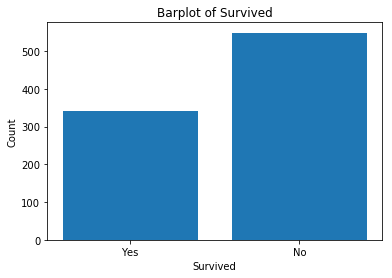

The frequency table of variable Pclass.
1st    216
2nd    184
3rd    491
Name: Pclass, dtype: int64


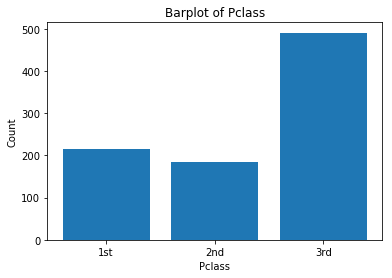

The frequency table of variable Sex.
female    314
male      577
Name: Sex, dtype: int64


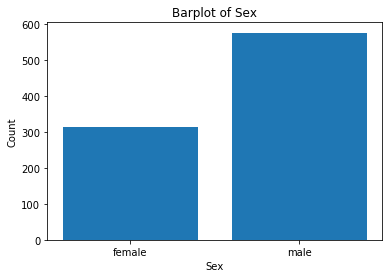

The frequency table of variable Embarked.
Queenstown      77
Cherbourg      168
Southampton    644
Name: Embarked, dtype: int64


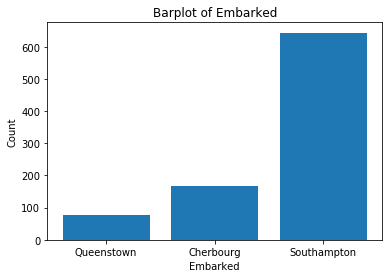

In [8]:
## Print the frequency table and barplot of these variables
for var in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    print("The frequency table of variable {}.".format(var))
    print(titanic[var].value_counts(sort = False))
    Barplot(var)

The barplots and frequency tables offer additional information that we did not obtain from the descriptive statistics of categorical variables. Apart from the most common class of the variable, we are able to know the frequency of every class of the corresponding variable.

## 4. Multiple-variable Exploration

**Question 5:** We are interested in what features may be correlated with survival. From the movie, we can learn that `kids` and `ladies` have the first priority to board the lifeboats. In this part, we would like to see if these are true in our dataset and if there are some other features that may be related with survival, too.

### 4.1 Women and Children Frist?

Here, we would like to take a look at variable `Age` and `Sex`. From the Titanic movie, we know that women and children had the first priority to board the lifeboats of Titanic. Statistics can help us find out if we truly should show our respect to those gentlemen who chose to be left behind, or it's just a movie.

First, I would like to define **children** to be the people who were not older than 14-years-old when this dataset were recorded, and **women** to be the people whose sex was recorded as female. We would like to use contingency table to see their correlationship.

We know that variable **Age** contains missing values. We would like to perform pairwise deletion when we perform any multiple variable exploration related with it.

In [9]:
## Build a new variable Children
titanic['Children'] = np.where(titanic["Age"] <= 14, "Yes",
                               np.where(titanic["Age"] > 14, "No", None))
## Print the contingency table of variables vs Survival
## Chi Square Statistic
for var in ["Children", "Sex"]:
    print("Contingency Table of {} vs Survival:".format(var))
    table = pd.crosstab(titanic[var], titanic["Survived"], margins = True)
    print(table)
    chi_sq = ss.chi2_contingency(table)
    print("The Chi Square value is {:.2f} with {:d} degrees of freedom. The p_value is {:.4f}.".format(
    chi_sq[0], chi_sq[2], chi_sq[1]), "\n")

Contingency Table of Children vs Survival:
Survived   No  Yes  All
Children               
No        392  245  637
Yes        32   45   77
All       424  290  714
The Chi Square value is 11.37 with 4 degrees of freedom. The p_value is 0.0227. 

Contingency Table of Sex vs Survival:
Survived   No  Yes  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891
The Chi Square value is 263.05 with 4 degrees of freedom. The p_value is 0.0000. 



From the first table of **Kids vs Survival**, we can read that we have 77 children among our 891 observations. 45 (58.44%) of them survived successfully while the rest 32 (41.56%) did not make it, which indicates that the survival rates are slightly greater than a half. For those passengers who are older than 14-years-old, the rates of survival and not are 36.49 and 63.51%, respectively. Additionally, the p value of our Chi Square statistic is 0.0063 which is less than 0.05, which means that we are confident to say that these variables are strongly associated.

From the second table of **Sex vs Survival**, we read that 314 of total 891 observations were females. 233 (74.20%) of them survived while 81 (25.80%) did not. The rates of survival and not for male passengers are 18.89% and 81.11%, respectively. Like the previous part, the p value of our Chi Square statistic is much less than 0.05. We are also confident to say that these two variables are strongly associaetd.

The comparison shows that women and passengers who are not older than 14-years-old's chances of survival are much higher than those of men and those who are older than 14-years-old. In addition to this, we can also notice the existence of overlapping since people's sex and age are not mutually exclusive. Hence, I also would like to find the survival rate of people who belong to "women and children" and that of people who do not belong to.

In [10]:
## Create new variable WorC (Women and Children First)
titanic["WorC"] = np.where((titanic['Children'] == "Yes") | (titanic['Sex'] == "female"), "Yes",
                           np.where((titanic["Children"] == "No") & (titanic['Sex'] == "male"), "No", None))
## Print the contingency table
## Chi Square Statistic
print("Contingency Table of Women or Children vs Survival:")
WorC_vs_Sur = pd.crosstab(titanic["WorC"], titanic["Survived"], margins = True)
print(WorC_vs_Sur)
Chi_Sq = ss.chi2_contingency(WorC_vs_Sur)
print("The Chi Square value is {:.2f} with {:d} degrees of freedom. The p_value is {:.4f}.".format(
    Chi_Sq[0], Chi_Sq[2], Chi_Sq[1]))

Contingency Table of Women or Children vs Survival:
Survived   No  Yes  All
WorC                   
No        342   72  414
Yes        99  254  353
All       441  326  767
The Chi Square value is 232.12 with 4 degrees of freedom. The p_value is 0.0000.


The contingency table above show that 254 (71.95%) among the 353 passengers who are women or children survived eventually while only 88 (16.36%) among 538 passengers who are neither women nor children made it. We are pretty confident to say that these passengers who were on Titanic did follow the "Women and Children First" rule. Apart from the contingency table, our Chi Square statistic and its corresponding p value which is much less than 0.05 also indicate the association between these two variables.

We should notice that there are several observations which contain missing **Age** value but its **Sex** value is "female". We would not delete those observations since they still belong to the group of "Women and Children".

Those gentlemen and people who belong to "Women and Children" but chose to give up their lives for others truly deserve our respect.

### 4.2 How about other features?

In addition to Sex and Age, we also have some other features in our dataset. In the stereotypical thoughts, those people who are in different **classes**, such as first class passengers of XXX Airlines, usually are always getting a better service. In this case, the service might be the priority of boarding the lifeboats. Here, we would like to see if those people who purchased tickets of different classes also faced different boarding lifeboat priority when that transportation disaster happened.

In [11]:
## Print the contingency table
## Chi Square Statistic
print("Contingency Table of Pclass vs Survival:")
Pclass_vs_Sur = pd.crosstab(titanic["Pclass"], titanic["Survived"], margins = True)
print(Pclass_vs_Sur)
Chi_Sq = ss.chi2_contingency(Pclass_vs_Sur)
print("The Chi Square value is {:.2f} with {:d} degrees of freedom. The p_value is {:.4f}.".format(
    Chi_Sq[0], Chi_Sq[2], Chi_Sq[1]))

Contingency Table of Pclass vs Survival:
Survived   No  Yes  All
Pclass                 
1st        80  136  216
2nd        97   87  184
3rd       372  119  491
All       549  342  891
The Chi Square value is 102.89 with 6 degrees of freedom. The p_value is 0.0000.


Here, we can read that both contingency table and the corresponding Chi Square statistic tell us that these two variables are associated. *More than a half* of passengers from 1st class, *slightly less than a half* of passengers from 2nd class, and *only one fourth* of passengers from 3rd class survived.

Indeed, we can clearly see the different survival rates among different classes. However, the result may be prejudical because it does not exactly indicate that on Titanic those passengers were treated in different ways, or lives of passengers who purchased 3rd class tickets were less valuable. This may also result from the different locations of different classes, etc. Additional reasearch must be done.

### 4.3 Additional Analysis

In the previous part, we manually define people whose **Age** is not older than 14 are "Children". I personally think this cutoff is a little subjective. Here, I would like to concentrate the variable **Age** directly. Descriptive statistics, histogram and boxplot will be used here.

Descriptive Statistics: level No of variable Age:
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64 

Descriptive Statistics: level Yes of variable Age:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64 



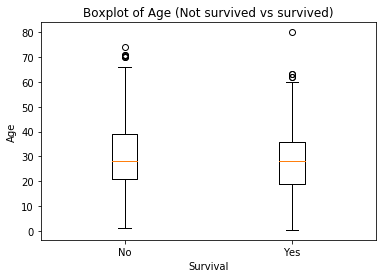

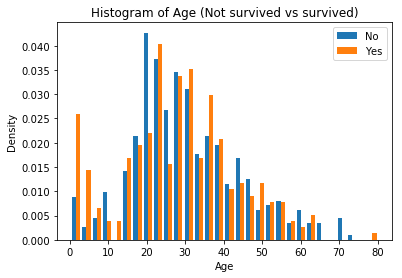

In [12]:
## This function is used for print descriptive statistics, drawing boxplot and histogram
## based on different Survival values
def Cont_Survival(var):
    x, y = [], []
    for i, j in titanic[var].groupby(titanic.Survived):
        y.append(j.dropna().tolist())
        x.append(i)
        print("Descriptive Statistics: level {} of variable {}:".format(i, var))
        print(j.dropna().describe(), "\n")
    plt.boxplot(y, labels = x)
    plt.title("Boxplot of {} (Not survived vs survived)".format(var))
    plt.xlabel("Survival")
    plt.ylabel(var)
    plt.show()
    plt.hist(y, 30, label = x, normed = True)
    plt.legend(loc = "upper right")
    plt.title("Histogram of {} (Not survived vs survived)".format(var))
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.show()

Cont_Survival('Age')

The descriptive statistics show that the five summary statistics and mean values are not obviously different from each other. And the same time, the boxplot basically tells the same story. But in the previous parts, we have learnt that only small proportion of passengers are not older than 14-years-old. Hence, we would like to dig a little bit deeper to see the histogram here.

As what the legend lists, color orange indicates survived passengers while color blue indicates passengers who died in that accident. We can see that the general trend of the two distributions are basically alike. When we select x-axis lower than 15, the length of orange bars are always longer than the blue bars, which indeed tells us that among the passengers who survived, a large proportion of them are very young.

## 5. Summary
### 5.1 Question reviewing

In this part, I would like to summarize the questions which I asked and answers that I successfully found.

**Question 1:**

How many observations and variables in our dataset? For the variables, what is the type of each variable, such as, continuous, discrete, etc?

**Answer 1:**

This dataset contains 891 observations and 12 variables.  
Continuous variables: Age, Fare  
Discrete variables: SibSp, Parch  
Categorical variables: Survived, Pclass, Sex, Cabin, Ticket, Embarked  
Primary keys: PassengerId, Name

**Question 2:**

Is there any invalid or missing value in our dataset? If yes, what would you like to do?

**Answer 2:**

Variable **Age**, **Cabin** and **Embarked** contain missing or invalid data.

For variable **Age**, we removed those missing records when we perform univariate exploration and used pairwise deletion when we perform multiple variable exploration. Especially, when we focus on "Women and Children", we notice that several observations contain missing **Age** but "female" **Sex** value. We would not delete those observations since they still belong to the group of "Women and Children".

For variable **Cabin**, I did not perform any analysis related with this variable because of the amount the missing data.

For variable **Embarked**, I did not do anything related with it, either.

**Question 3:**

What are the distributions of our numerical variables? Can I find ways to present their distributions quantatitively and visually? For example, what are the basic five number summary statistics, do those two have any missing or invalid values, etc?

**Answer 3:**

The numerical variables include both continuous and discrete variables. For the continuous variables, we have Age and Fare. For discrete variables, we have SibSp and Parch.

The distributions of both **Age** and **Fare** are positively skewed. For variable **Age**, its middle part is slightly taller than the normal distribution that has the same mean and standard deviation. Hence, we may consider it a "distorted" normal distribution. For variable **Fare**, we may notice that basically it follows its normal distribution line after we performed logarithm transformation except there is one extremely tall bar.

We used barplots to present variable **SibSp** and **Parch**'s distributions. We found that actually many passengers did not travel with their siblings or children. And very few passengers travered with more than 1 sibling or 2 children. Actually, this record may not be exactly true, because people may travel with their grandchildren or even great grandchildren.

**Question 4:**

What are the distributions of our categorical variables? Is there any variable that you think not as useful as the others? If yes, why? Do those variables have any missing or invalid records? What information can we get from their distributions.

**Answer 4:**

For variable **Survived**, we have two different classes and the class `No` with frequency being 549 is more common than another one `Yes` which stands for whether the passenger survived or not, respectively. We can read that 549 passengers among these 891 did not make it while the rest 342 successfully survived eventually.

For variable **Pclass**, we have three different classes and the class `3rd` with frequency being 491 is the most common one. We can got from the description file that the value `1st`, `2nd` and `3rd` indicate `First`, `Second` and `Third` ticket class, respectively, which means that most passengers of these 891 records belong to the third class.

For variable **Sex**, we have two different classes and the class `male` with frequency being 577 is more common than another class `female`. This tells us that 577 of the 891 passengers are males while the rest 314 passengers are females.

For variable **Ticket**, we have 681 different classes among the 891 observations. This indicates that the frequency of most classes contain very few passengers or even only one. This one is basically like those two **PassengerId** and **Name** which we have discussed in the introduction part since very few of them contain duplicate values.

For variable **Cabin**, we have 147 different classes among the 204 valid records among all 891 observations. Like the previous variable, very few lines of this variable contains duplicate values, which makes it almost a primary key. **Cabin** among these six variables is the only one which contains missing values and actually 77% of the values of this variable is missing. 

For variable **Embarked**, we have three different classes and the class `Southampton` with frequency being 644 is the most common one. The three classes `Cherbourg`, `Queenstown` and `Southampton` show us which port did the passenger use to board Titanic.

**Question 5:**

We are interested in what features may be correlated with survival. From the movie, we can learn that `kids` and `ladies` have the first priority to board the lifeboats. In this part, we would like to see if these are true in our dataset and if there are some other features that may be related with survival, too.

**Answer 5:**

The variable **Age** and **Sex** do associate with variable **Survived**. We set 14-years-old to be the cutoff of children and non-children. We found that the survival rate of children is higher than non-children, the survival rate of females is higher than males, and the survival rate of "Women and Children" is higher than non-"Women and Children".

In addition to that, we also notice that the variable **Pclass** is associated with **Survived**, as well. The survival rates of 1st, 2nd and 3rd passengers are going down monotonically. However, there may still exist some other reasons like the location of passengers from different classes which lead to this association.

If we remove the cutoff that we set and use variable **Age** directly, we would still notice that the proportion of young people among passengers who survived is higher than the proportion of young people among passenger who did not make it.

### 5.2 Possible future work

There are some variables that I did not mainly focus on. For example, variable **Name** is treated as a primary key here. If possible, we can try to find some dataset from other sources and merge them based on variable **Name** to see if we can find some other interesting stories.

There are some other variables that may be related with each other, and we may ask additional interesting questions. For example, we would like to explore variable **Pclass** and **Fare**.  Here is the question that I would like to ask. Did passengers from the same ticket class spend the same or approximately same amount of money? If no, are those ranges reasonable or understandable?

### 5.3 Limitation

From the description file, we know that this dataset contains only 891 out of 2224 passengers. We have no idea how this sample was generated from the population, which means that our conclusion here may not be able to represent our population. For example, if this sample is generated because all these passengers' tickets were purchased from the same travel agent, I should doubt the conclusion that we had here.

From the previous parts, we notice that three variables **Age**, **Cabin** and **Embarked** contain missing or invalid values. For variable **Embarked**, only 2 of them is missing. Under this situation, removing those two observations should be fine. However, for variable **Age**, 177 out of 891 are missing. Here, removing them may give us a totally different conclusion even if in this project I still used pairwise deletion. Apart from deletion, we may also consider filling missing values with mean, median, or regression prediction.

## Reference

- Suites and Cabins for Passengers on the Titanic - dummies, http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/

- Women and Children First, https://en.wikipedia.org/wiki/Women_and_children_first

- Matplotlib, http://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes